# Simple Linear Regression 簡單線性迴歸的練習 

We use the dataset `BostonHousing` to learn simple learning regression.

In this course, we want to know the relationship between `medv` and `rm`,
where medv is "Median value of owner-occupied homes in $1000's" and rm is "average number of rooms per dwelling".

The dataset is named `Boston_HousingData.csv`.

在這個例子中，我們使用波士頓房價的資料集為例，練習簡單線性迴歸。

在本例中，我們想建立 `medv` and `rm` 之間的迴歸模型。

其中 medv 代表「住房價值的中位數（單位：一千美元）」，而 rm 代表「平均每戶住宅所擁有的房間數量」。

資料集的名稱為 `Boston_HousingData.csv`.

The meaning of each column is as follows (每個欄位的意思如下)：

- CRIM: per capita crime rate by town (人均犯罪率)
- ZN: proportion of residential land zoned for lots over 25,000 sq.ft. (規劃住宅用地超過 25000 平方英尺的比例)
- INDUS: proportion of non-retail business acres per town (非零售業的比例)
- CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) (查爾斯河虛擬變數) (=1 代表大片土地，否則為 0)
- NOX: nitric oxides concentration (parts per 10 million) (氮的氧化物濃度(1000萬分之一))
- RM: average number of rooms per dwelling (平均每人所住房間數)
- AGE: proportion of owner-occupied units built prior to 1940  (1940 年前自用住宅比例)
- DIS: weighted distances to five Boston employment centres (到達 5 個波士頓就業中心的加權距離)
- RAD: index of accessibility to radial highways (到達 radial highways 的系數)
- PTRATIO: pupil-teacher ratio by town (城填師資比例)
- TAX: full-value property-tax rate per $10,000 (每 10,000 元的產權稅率)

- B:1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town (城填中黑人的比例)
- LSTAT    % lower status of the population (低端人口的比例)
- MEDV     Median value of owner-occupied homes in $1000's (自用住宅價格的中位數 (1000美元))



## Quest 

1. Find the regression model among `MEDV` and `RM` (找出 `MEDV` and `RM` 間的迴歸模型)
2. Draw the regression line between `MEDV` and `RM` (畫出 `MEDV` and `RM` 的迴歸線)
3. Evaluate the performance of our regression model (評估我們迴歸模型的好壞)
4. Use the regression model to predict a MEDV by giving a RM value (給一個 RM 值，使用我們的迴歸模型預測 MEDV)

## Import packages and load the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
bodf = pd.read_csv('Boston_HousingData.csv')
bodf.head(8)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,NaN,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1


In [3]:
bodf.shape

(506, 14)

In [4]:
bodf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


## Draw the scatter plot

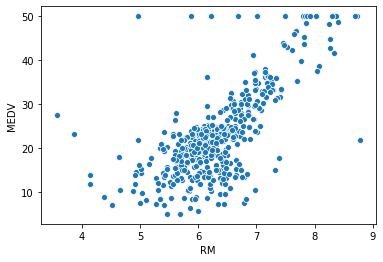

In [5]:
sns.scatterplot(x = bodf.RM, y = bodf.MEDV)

We can see that RM and MEDV have a linear relationship.

可以看到，房價和房間數量應該是呈現線性相關的趨勢 (而且是正相關)。



## Draw the regression line

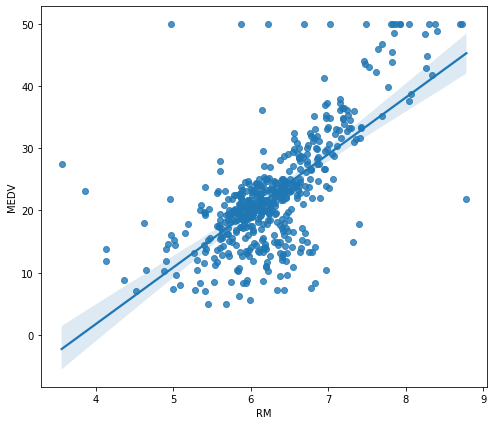

In [6]:
plt.figure(figsize=(8, 7))
sns.regplot(x = bodf.RM, y = bodf.MEDV)

## 截取 MEDV 當成 Y, 截取 RM 當成 X

我們要做單變量迴歸，用 RM 來預測 MEDV (房價)

Our regression model is $MEDV = \beta_0 + \beta_1 \times RM$.

We simply rewrite is as $y = \beta_0 + \beta_1 \times x$ where $MEDV \leftrightarrow y$ and $RM \leftrightarrow x$.

底下我們使用 `sklearn` 這個套件完成建立模型的動作。

### Scikit-learn

Scikit-learn (formerly scikits.learn and also known as sklearn) is a free software machine learning library for the Python programming language. It features various classification, regression and clustering algorithms including support vector machines, random forests, gradient boosting, k-means and DBSCAN, and is designed to interoperate with the Python numerical and scientific libraries NumPy and SciPy.

SKlearn (全名為 scikit-learn) 為一個 Python 的套件，專門用來完成機器學習的工作。最初是由 `David Cournapeau` 所創建，它是建立在 Numpy 及 SciPy 這兩個套件之上。

In [7]:
X = bodf.loc[:, ['RM']]
Y = bodf.loc[:, ['MEDV']]
# You can also use the following syntax sugar to do the same job (你也可以用底下的語法糖來完成上述的工作)
# X = bodf.loc[['RM']]
# Y = bodf.loc[['MEDV']]
print(X.head())
print(Y.head())

      RM
0  6.575
1  6.421
2  7.185
3  6.998
4  7.147
   MEDV
0  24.0
1  21.6
2  34.7
3  33.4
4  36.2


## Split training set and the test set (切割出訓練集，以及測試集)

We use sklearn to split the training set and the test set.

`test_size` represents the proportion of the dataset to include in the test split.

`test_size` 屬性代表要放入 test 資料集的比例。如果指定為 1/3，那代表全部資料的 1/3 要被放入測試集。

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 1/3, random_state = 0)

## Draw the regressio line between X_train and y_train

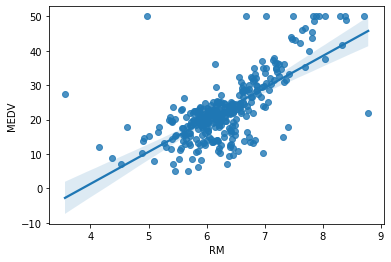

In [9]:
sns.regplot(x = X_train["RM"], y = y_train["MEDV"])

## Train the regression model (訓練迴歸器)

In [10]:
# 匯入 linear regression 的套件
from sklearn  import linear_model
regressor = linear_model.LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Find $\beta_0$ and $\beta_1$

In [11]:
print(regressor.intercept_)
print(regressor.coef_[0])


[-35.83043813]
[9.29194184]


## 找出預測結果，並畫出預測結果和真實結果的迴歸線

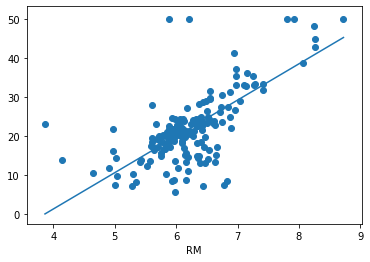

In [12]:
y_pred = regressor.predict(X_test)
# 針對 測試資料集的RM，以及預測的值，畫出直線。
plt = sns.lineplot(x = X_test["RM"], y = y_pred.ravel())
# 接著再畫出 真實的點。
plt.scatter(x = X_test["RM"], y = y_test)

## Determine RMSE

In [13]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
np.sqrt(mse)
print("MSE is %.2f and RMSE is %.2f" % (mse, np.sqrt(mse)))

MSE is 44.11 and RMSE is 6.64


## MAE

In [14]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

4.3206666241606495

## Determine $R^2$

In [15]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.446846413877101

In [16]:
regressor.score(X_test, y_test)

0.446846413877101

## Given the number of room, find it's MEDV

Given a set of RMs (e.g., 5, 5.4, 6), use our model to predict the MEDV. 

給定一系列房間 (如 5, 5.4, 6)，預測它們的 MEDV. 

In [17]:
regressor.predict([[5],[5.4],[6]])

array([[10.62927105],
       [14.34604779],
       [19.92121289]])